In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.rc('axes', unicode_minus=False)
plt.rc('font', family='Malgun Gothic')

import pandas as pd

In [2]:
df = pd.read_excel('data/sample-line-1.xlsx', index_col='날짜')
print(df.shape)
df.head()

(3189, 5)


,체결가,전일비,등락률,거래량(천주),거래대금(백만)
날짜,,,,,
2018-11-23,266.33,1.43,-0.53%,58346,2670694
2018-11-22,267.76,0.51,-0.19%,63147,2917863
2018-11-21,268.27,1.31,-0.49%,79375,3726326
2018-11-20,269.58,2.73,-1.00%,79088,3667388
2018-11-19,272.31,0.66,+0.24%,73094,3401282


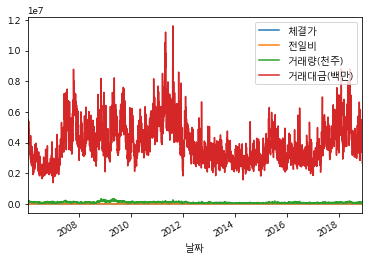

In [7]:
ax = df.plot()
figure=ax.figure   #Chart를 Image로 변환

figure.savefig('일일현황주식.png')

In [8]:
%ls *.png

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 42DE-BDD6

 C:\Users\gusdyd98\Documents\python\pyvisual 디렉터리

2019-12-07  오전 11:31            24,798 일일현황주식.png
               1개 파일              24,798 바이트
               0개 디렉터리  17,431,719,936 바이트 남음


In [9]:
from IPython.display import Image

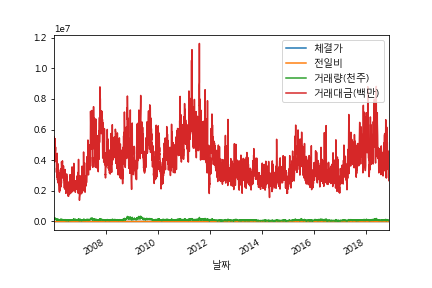

In [10]:
Image('일일현황주식.png')

# 엑셀에 차트 이미지 삽입하기

In [11]:
import xlwings as xw

In [12]:
xw.__version__

'0.15.10'

In [13]:
sheet = xw.sheets.active
sheet

<Sheet [Book1]Sheet1>

In [16]:
sheet.pictures.add(figure)

<Picture '그림 1' in <Sheet [Book1]Sheet1>>

In [17]:
sheet.pictures.add(figure)

<Picture '그림 2' in <Sheet [Book1]Sheet1>>

In [18]:
sheet.pictures

Pictures([<Picture '그림 1' in <Sheet [Book1]Sheet1>>, <Picture '그림 2' in <Sheet [Book1]Sheet1>>])

In [22]:
sheet.pictures.add(figure, name='일일주식현황.png', update=True)

<Picture '일일주식현황.png' in <Sheet [Book1]Sheet1>>

In [24]:
df.iloc[:10]

,체결가,전일비,등락률,거래량(천주),거래대금(백만)
날짜,,,,,
2018-11-23,266.33,1.43,-0.53%,58346,2670694
2018-11-22,267.76,0.51,-0.19%,63147,2917863
2018-11-21,268.27,1.31,-0.49%,79375,3726326
2018-11-20,269.58,2.73,-1.00%,79088,3667388
2018-11-19,272.31,0.66,+0.24%,73094,3401282
2018-11-16,271.65,0.11,+0.04%,72867,3382415
2018-11-15,271.54,2.66,+0.99%,72804,3522952
2018-11-14,268.88,0.82,-0.30%,85611,4249973
2018-11-13,269.70,1.87,-0.69%,85526,4513373


In [27]:
#xw.view(df.iloc[:10], sheet=sheet)

sheet.range('A1').value=df.iloc[:10]

In [43]:
table_range=sheet.range('A1').expand()
picture_left=table_range.left+table_range.width
picture_top=table_range.top
sheet.pictures.add(figure, name='일일주식현황.png', update=True, left=picture_left, top=picture_top)

<Picture '일일주식현황.png' in <Sheet [Book1]Sheet1>>

In [30]:
left=sheet.range('G1').left

In [31]:
top=sheet.range('G1').top

In [33]:
sheet.pictures.add(figure, name='일일주식현황.png', update=True, left=left, top=top)

<Picture '일일주식현황.png' in <Sheet [Book1]Sheet1>>

In [48]:
def 엑셀에_반영(start_range, df, name):
    ax = df.plot(figsize=(7,4))
    start_range.value=df.iloc[:10]
    
    table_range=start_range.expand()
    left=table_range.left + table_range.width + 1
    top= table_range.top
    start_range.sheet.pictures.add(ax.figure, name=name, update=True, left=left, top=top)
    
    table_range.columns.autofit()

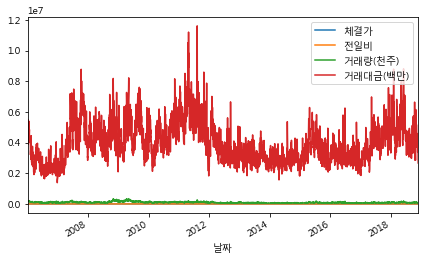

In [49]:
엑셀에_반영(xw.Range('C3'), df,'일일주식현황')

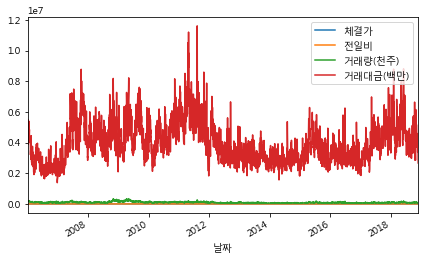

In [53]:
index = df.index
sample_df=df.sample(frac=1).reset_index(drop=True)
sample_df.index=index

엑셀에_반영(xw.Range('C3'), df, '일일주식현황')
